In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import numpy as np
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep

In [2]:
# Get data and set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# Country boundaries
et.data.get_data(url="https://ndownloader.figshare.com/files/22507058")
# Continent boundaries
et.data.get_data(url="https://ndownloader.figshare.com/files/23392280")

'/home/jovyan/earth-analytics/data/earthpy-downloads/continent-poly'

In [3]:
# Define path to file
plot_centroid_path = os.path.join("final-project", "grand-data",
                                  "GRanD_Version_1_3", "GRanD_dams_v1_3.shp")

# Import shapefile using geopandas
grand_plot_locations = gpd.read_file(plot_centroid_path)
#grand_plot_locations

In [4]:
# Get list of all column names
for col in grand_plot_locations.columns:
    print(col)

GRAND_ID
RES_NAME
DAM_NAME
ALT_NAME
RIVER
ALT_RIVER
MAIN_BASIN
SUB_BASIN
NEAR_CITY
ALT_CITY
ADMIN_UNIT
SEC_ADMIN
COUNTRY
SEC_CNTRY
YEAR
ALT_YEAR
REM_YEAR
DAM_HGT_M
ALT_HGT_M
DAM_LEN_M
ALT_LEN_M
AREA_SKM
AREA_POLY
AREA_REP
AREA_MAX
AREA_MIN
CAP_MCM
CAP_MAX
CAP_REP
CAP_MIN
DEPTH_M
DIS_AVG_LS
DOR_PC
ELEV_MASL
CATCH_SKM
CATCH_REP
DATA_INFO
USE_IRRI
USE_ELEC
USE_SUPP
USE_FCON
USE_RECR
USE_NAVI
USE_FISH
USE_PCON
USE_LIVE
USE_OTHR
MAIN_USE
LAKE_CTRL
MULTI_DAMS
TIMELINE
COMMENTS
URL
QUALITY
EDITOR
LONG_DD
LAT_DD
POLY_SRC
geometry


In [5]:
# Create a new dataframe with only needed columns
grand_plots = grand_plot_locations[['GRAND_ID', 'DAM_NAME','RIVER','COUNTRY', 
                                    'geometry','MAIN_USE', 'CATCH_SKM', ]].copy()
grand_plots

,GRAND_ID,DAM_NAME,RIVER,COUNTRY,geometry,MAIN_USE,CATCH_SKM
0,1,Terror Lake,Terror River,United States,POINT (-153.02665 57.65149),Hydroelectricity,41
1,2,Mayo,Mayo,Canada,POINT (-135.36705 63.77418),Hydroelectricity,1174
2,3,Blue Lake,Sawmill Creek,United States,POINT (-135.20030 57.06214),Hydroelectricity,97
3,4,Green Lake,Vodopad River,United States,POINT (-135.11281 56.98679),Hydroelectricity,81
4,5,Long Lake Dam,Long River,United States,POINT (-133.72841 58.16875),Hydroelectricity,79
...,...,...,...,...,...,...,...
7315,7316,Sardis Lake,Jackfork Creek,United States,POINT (-95.35071 34.62981),Flood control,712
7316,7317,Tims Ford,Elk River,United States,POINT (-86.27625 35.19723),Flood control,1376
7317,7318,Cordell Hull Dam,Cumberland River,United States,POINT (-85.94413 36.29222),Hydroelectricity,20894
7318,7319,Merwin,Lewis River,United States,POINT (-122.55538 45.95749),Hydroelectricity,1899


In [6]:
# View the geometry type of each row
grand_plots.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
7315    Point
7316    Point
7317    Point
7318    Point
7319    Point
Length: 7320, dtype: object

In [7]:
# Explore main_use column
grand_plots['MAIN_USE'].value_counts()

Irrigation          1896
Hydroelectricity    1822
Water supply         892
Flood control        577
Recreation           294
Other                208
Navigation            56
Fisheries             14
Name: MAIN_USE, dtype: int64

<AxesSubplot:>

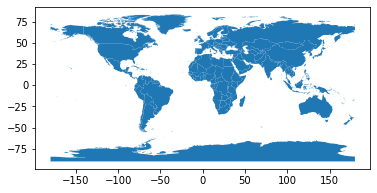

In [8]:
# Import country boundaries
countries_path = os.path.join("data", "earthpy-downloads", "country-borders", 
                              "99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp")
countries_border = gpd.read_file(countries_path)
# THE continent border is not needed, same map with less boundaries
# continent_path = os.path.join("data", "earthpy-downloads", "continent-poly", "Continents.shp")
# continent_border = gpd.read_file(continent_path)
# # all shape files are in same CRS, espg 4326
# # Appending boundaries
# joined = countries_border.geometry.append(continent_border.geometry)
countries_border.plot()

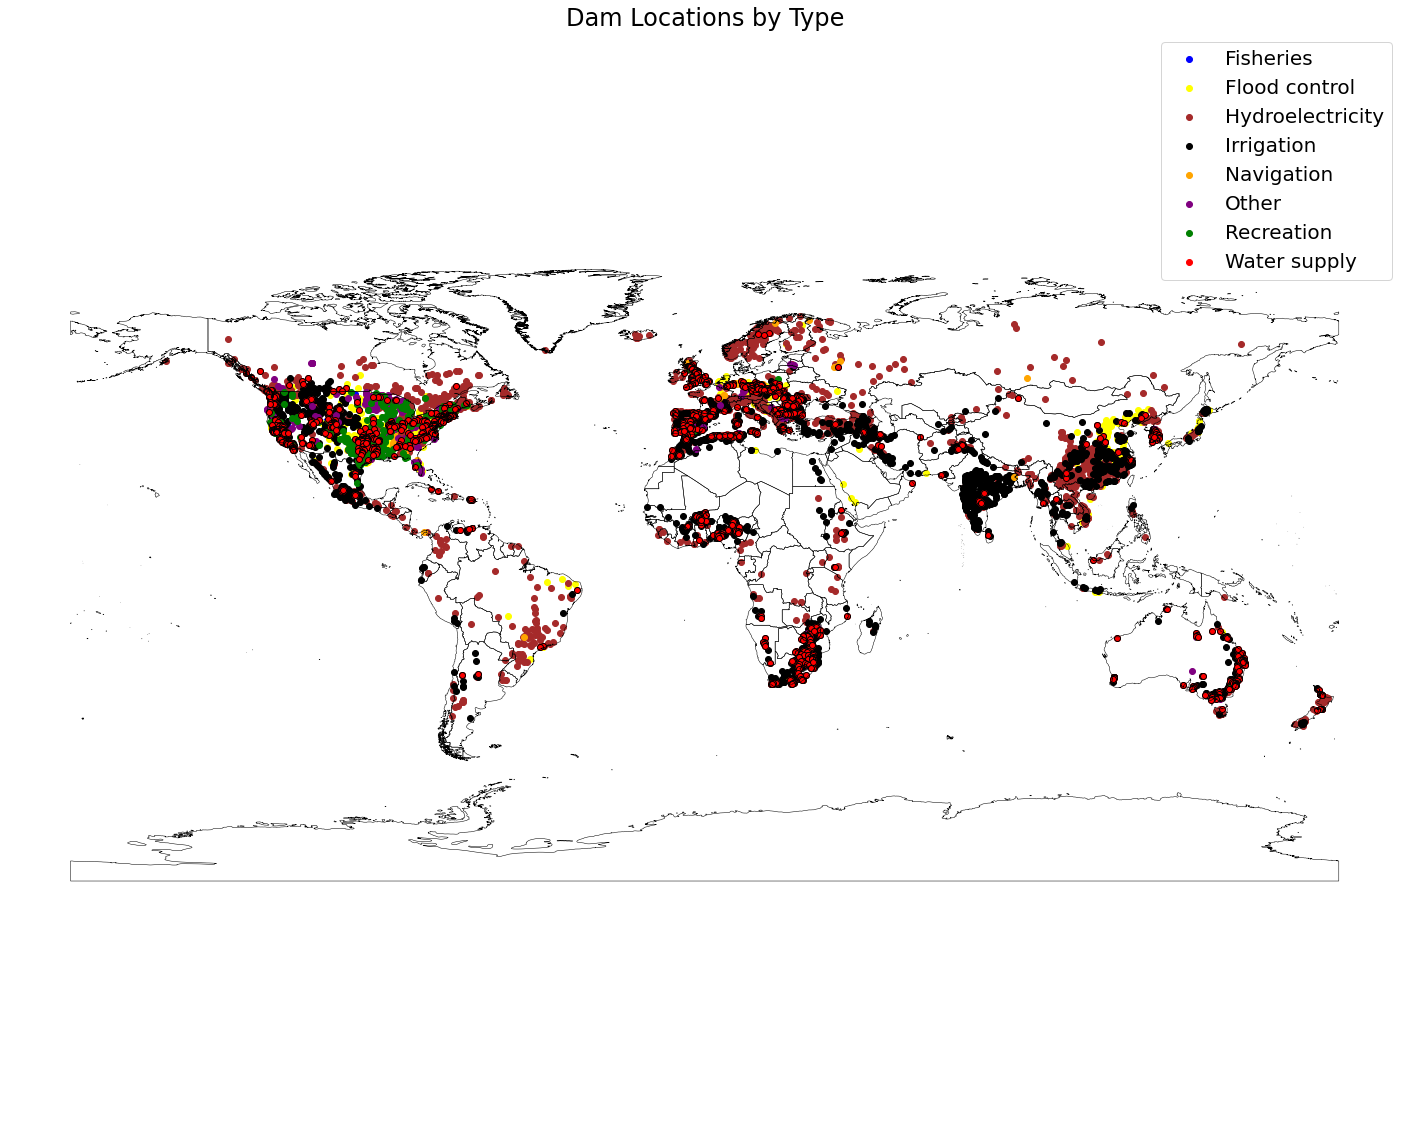

In [9]:
# Create a dictionary with main use
main_use = {'Irrigation': 'black',
            'Hydroelectricity': 'brown',
            'Water supply': 'red',
            'Flood control': 'yellow',
            'Recreation': 'green',
            'Other': 'purple',
            'Navigation': 'orange',
            'Fisheries': 'blue',
            'Unknown': 'black'}

# Plot the data
fig, ax = plt.subplots(figsize=(25, 20))

for ctype, grand_plots in grand_plots.groupby('MAIN_USE'):
    color = main_use[ctype]
    label = ctype
    grand_plots.plot(color=color,
                     ax=ax,
                     label=label)
    

grand_plots.plot(color=color, edgecolor="black", ax=ax)
countries_border.plot(color="none",edgecolor="black", linewidth=.5, ax=ax)

ax.legend()
ax.set_title("Dam Locations by Type", fontsize=24)
plt.legend(fontsize=20)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [10]:
grand_plots['COUNTRY'].value_counts()

United States      345
Australia           85
United Kingdom      51
South Africa        47
Spain               44
Germany             26
Romania             21
Zimbabwe            19
Canada              18
New Zealand         17
Italy               17
China               16
Czech Republic      16
Burkina Faso        15
Nigeria             14
Poland              12
South Korea         12
Algeria             10
Bulgaria             9
Mexico               8
Serbia               8
France               7
Namibia              7
Morocco              6
Iran                 5
India                4
Botswana             4
Pakistan             4
Sweden               3
Tunisia              3
Venezuela            3
Brazil               3
Greece               3
Sri Lanka            2
Angola               2
Belgium              2
Cuba                 2
Hungary              2
Ethiopia             2
Kenya                2
Portugal             2
Argentina            2
Slovakia             2
Malaysia   

In [11]:
# TODO figure out how to coorelate the country with continent
# Add a continent column 
grand_plots["CONTINENT"] = grand_plots["COUNTRY"]
grand_plots

,GRAND_ID,DAM_NAME,RIVER,COUNTRY,geometry,MAIN_USE,CATCH_SKM,CONTINENT
11,12,Fulton River,Fulton,Canada,POINT (-126.22038 54.80659),Water supply,1409,Canada
13,14,Diana Lake,Diana,Canada,POINT (-130.08163 54.19863),Water supply,51,Canada
15,16,Cougar Lake Dam,None,Canada,POINT (-128.89871 53.02514),Water supply,140,Canada
31,32,Seymour Falls,Seymour,Canada,POINT (-122.96629 49.44115),Water supply,127,Canada
32,33,Cleveland,Capilano,Canada,POINT (-123.10937 49.36128),Water supply,196,Canada
...,...,...,...,...,...,...,...,...
7272,7273,Yunlong,Yunlong,China,POINT (102.45518 25.87271),Water supply,728,China
7286,7287,Qincun,Huang,China,POINT (121.00255 29.51794),Water supply,313,China
7306,7307,New Waddell Dam,Agua Fria,United States,POINT (-112.27380 33.84918),Water supply,3707,United States
7308,7309,Salmon Falls Dam,Salmon Falls Creek,United States,POINT (-114.73281 42.21041),Water supply,4082,United States


In [12]:
## Can't remember what I was trying here
#grand_plots['freq']=grand_plots.groupby(by='COUNTRY').transform('count')
#grand_plots['freq']=grand_plots.groupby(by='MAIN_USE').transform('count')

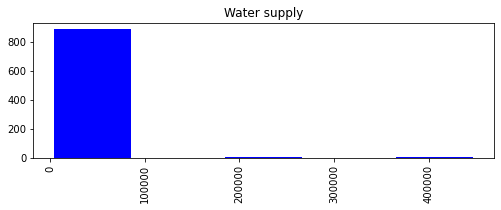

In [15]:
# Working on a historgram for catchment vs main use
ax = grand_plots.hist(column='CATCH_SKM', by='MAIN_USE', bins=5, 
                      grid=False, figsize=(8,10), layout=(3,1), sharex=True, 
                      color='blue', zorder=2, rwidth=0.9)


In [14]:
# Create histograms of dam type
colors = ['r', 'g', 'b', 'k', 'c', 'm','y', 'orange']
titles = ['Irrigation','Hydroelectricity','Water supply',
'Flood control', 'Recreation','Other','Navigation','Fisheries']

ep.hist(grand_plots.values, 
        colors=colors, 
        title=titles, 
        cols=4)

plt.show()

TypeError: '<=' not supported between instances of 'int' and 'str'